In [1]:

import numpy as np 
import pandas as pd 


Epoch
1 fw and bw pass of all all training samples

batch Size
No of training samples in one forwad and backward pass

No of iterations
no of passes using batch size no of samples

So N_total = 1000
batch_sie=100
no of iterations =1000/100 = 10 iterations per epoch


## Importing required libraries

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import Dataset,DataLoader
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print('import done')

import done


## Reading the data you are provided with

In [20]:
base_dir=  'data/'
final_test = pd.read_csv(base_dir+"/test.csv", dtype=np.float32)
train = pd.read_csv(base_dir+'/train.csv',dtype=np.float32)
labels = train.label.values
features = train.loc[:, train.columns != 'label'].values/255



## Split Train test

In [21]:
# Split into training and test set
X_train, X_validation, y_train, y_validation = train_test_split(features, labels, test_size=0.2, random_state=42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
XTrain = torch.from_numpy(X_train)
yTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
XValidation = torch.from_numpy(X_validation)
yValidation = torch.from_numpy(y_validation).type(torch.LongTensor) # data type is long



## Load Train and Validation Data

In [23]:
# Define hyperparameters
batch_size = 256
learning_rate = 0.001

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(XTrain,yTrain)
validation = torch.utils.data.TensorDataset(XValidation,yValidation)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validation, batch_size = batch_size, shuffle = True)

## Constructing the model

In [10]:
# for each image
input_size = 784
num_class = 10



In [24]:


class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 Hidden Layer Network
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 probbability
        self.dropout = nn.Dropout(p=0.2)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax
        
    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        
        x = self.log_softmax(self.fc5(x), dim=1)
        
        return x

In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 Hidden Layer Network
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 probbability
        self.dropout = nn.Dropout(p=0.2)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax
        
    def forward(self, x):
        x = self.dropout(nn.ReLU(self.fc1(x)))
        x = self.dropout(nn.ReLU(self.fc2(x)))
        x = self.dropout(nn.ReLU(self.fc3(x)))
        x = self.dropout(nn.ReLU(self.fc4(x)))
        
        x = self.log_softmax(self.fc5(x), dim=1)
        
        return x

## Define optimizer

In [12]:
optimizer      = torch.optim.Adam
opt = optimizer(model.parameters(),lr=0.0015)

## Training the model using logistic regression

In [13]:
def fit(epochs,model,data):
    
    loss_fun = F.cross_entropy
    hist = []
    for Epoch in range(epochs):
        for img,label in data:
            out = model(img/255)
            loss = loss_fun(out,label)
            loss.backward()
            opt.step()
            opt.zero_grad()
            hist.append(loss)
        
        if (Epoch+1)%10 ==0:
            print(f"Epoch:[{Epoch+1}/{epochs}] ; Loss : {loss}")
    return hist
      

In [14]:
# Instantiate our model
model = Classifier()
# Define our loss function
criterion = nn.NLLLoss()
# Define the optimier
optimizer = torch.optim.Adam(model.parameters(), lr=0.0015)

epochs = 25
steps = 0
print_every = 50
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        steps += 1
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0

            # Turn off gradients for validation
            with torch.no_grad():
                model.eval()
                for images, labels in test_loader:
                    log_ps = model(images)
                    test_loss += criterion(log_ps, labels)

                    ps = torch.exp(log_ps)
                    # Get our top predictions
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

            model.train()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_losses[-1]),
                  "Test Loss: {:.3f}.. ".format(test_losses[-1]),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/25..  Training Loss: 0.441..  Test Loss: 0.488..  Test Accuracy: 0.848
Epoch: 1/25..  Training Loss: 0.612..  Test Loss: 0.308..  Test Accuracy: 0.907
Epoch: 2/25..  Training Loss: 0.036..  Test Loss: 0.215..  Test Accuracy: 0.934
Epoch: 2/25..  Training Loss: 0.125..  Test Loss: 0.188..  Test Accuracy: 0.944
Epoch: 2/25..  Training Loss: 0.201..  Test Loss: 0.155..  Test Accuracy: 0.955
Epoch: 3/25..  Training Loss: 0.040..  Test Loss: 0.158..  Test Accuracy: 0.956
Epoch: 3/25..  Training Loss: 0.099..  Test Loss: 0.137..  Test Accuracy: 0.960
Epoch: 4/25..  Training Loss: 0.003..  Test Loss: 0.121..  Test Accuracy: 0.966
Epoch: 4/25..  Training Loss: 0.043..  Test Loss: 0.134..  Test Accuracy: 0.961
Epoch: 4/25..  Training Loss: 0.087..  Test Loss: 0.115..  Test Accuracy: 0.966
Epoch: 5/25..  Training Loss: 0.016..  Test Loss: 0.130..  Test Accuracy: 0.964
Epoch: 5/25..  Training Loss: 0.053..  Test Loss: 0.120..  Test Accuracy: 0.966
Epoch: 5/25..  Training Loss: 0.088..  T

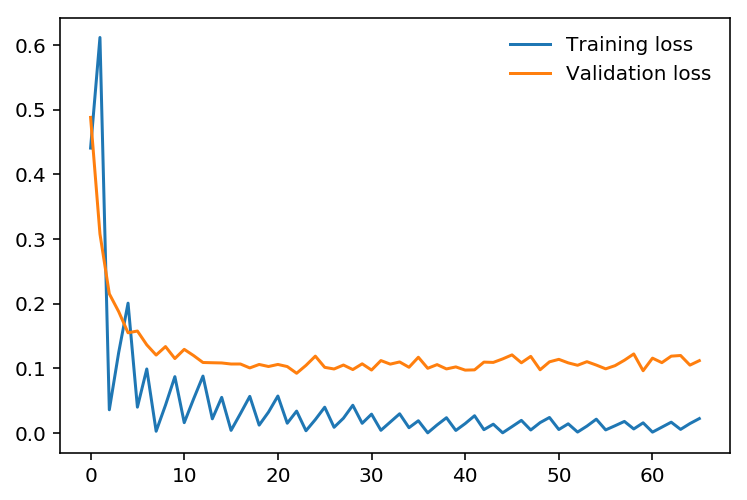

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

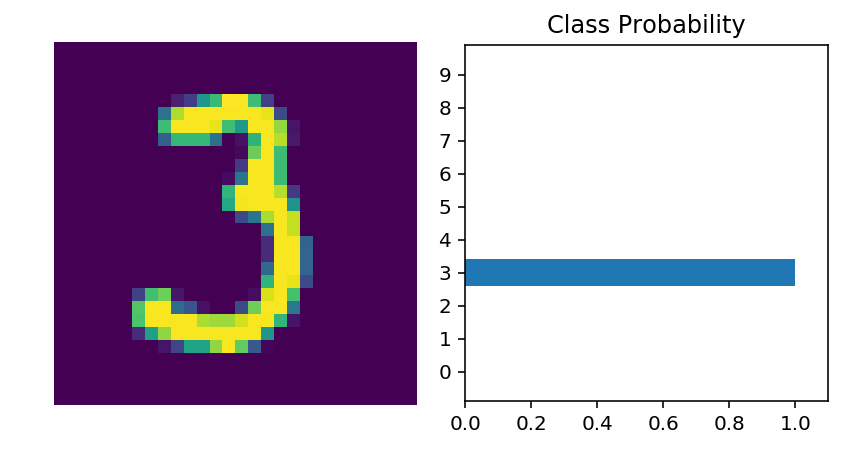

In [ ]:
%matplotlib inline
def make_prediction(data):
    images, labels = next(iter(data))

    img = images[42].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    view_classify(img.view(1, 28, 28), ps)
make_prediction(test_loader)

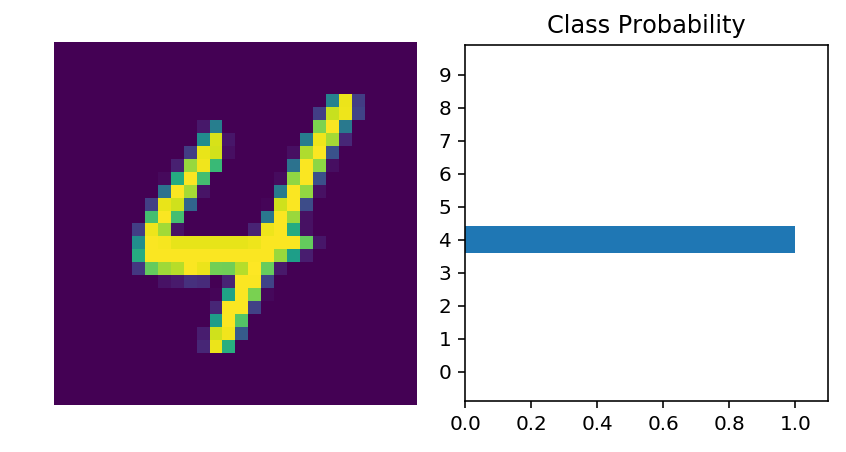

In [ ]:
final_test_np = final_test.values/255
test_tn = torch.from_numpy(final_test_np)

# Creating fake labels for convenience of passing into DataLoader
## CAUTION: There are other ways of doing this, I just did it this way
fake_labels = np.zeros(final_test_np.shape)
fake_labels = torch.from_numpy(fake_labels)

submission_tn_data = torch.utils.data.TensorDataset(test_tn, fake_labels)

submission_loader = torch.utils.data.DataLoader(submission_tn_data, batch_size = batch_size, shuffle = False)


# Seeing what our model does on test data
make_prediction(submission_loader)




In [ ]:
def acc(data):
    accuracy=[]
    for img , label in data:
        out = model(img/255)
        _,pred_index =torch.max(out,dim=1)
        x=torch.sum(pred_index==label)
        x=x/len(label)
        x=x*100
        accuracy.append(x)
    return np.mean(accuracy)
        
        

In [ ]:
acc(val_loader)

97.96519

In [ ]:
# plt.plot(hist, range(32100))

In [ ]:
submission= pd.read_csv("../input/digit-recognizer/sample_submission.csv")
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
len(submission)


28000

In [ ]:
def prediction(data):
    LABEL=[]
    
    out = model(data/255)
    out = F.softmax(out)     
    _,pred_index =torch.max(out,dim=1)
    LABEL.append(pred_index)   
    return LABEL

In [ ]:
x=prediction(test_ds)
len(x[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


28000

In [ ]:
x=x[0].numpy()

In [ ]:
submission["Label"]=x

In [ ]:
submission.to_csv("submission.csv",index=False)

## DO UPVOTE !!